In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
save_location = "/media/bhux/alpha/xsd_mvp/test/"

# uniform, lg, gaussian

NUMERICAL = 12
CATEGORICAL = 0

INFILLING_TYPE = ''
NOISE_TYPE = ''

In [3]:
from utils import remove_outliers, norm, sample_local_gaussian, convert_categorical, unison_shuffled_copies


In [4]:
def xyhist(x, y, title):
    plt.hist(x, bins=50, alpha=0.5, label='Synthetic', density=True)
    plt.hist(y, bins=50, alpha=0.5, label='Real', density=True)
    plt.title(title)
    plt.yscale('log')
    plt.xlabel("Normalized Range")
    plt.ylabel("Probability Density")
    plt.legend(loc='upper right')
    plt.show()

In [5]:
PATH = "./data/xtended_data_all.csv"
gt = pd.read_csv(PATH).drop(labels=['Drug'], axis=1)
f = pd.read_csv(PATH)
smiles = f['Drug'].values
vlists = {
    col: f[col].values for col in f.drop(labels=['Drug'], axis=1).columns[:12] 
}



inmask = remove_outliers([v for _,v in vlists.items()])
print(sum(inmask))
smiles = smiles[inmask]
vlists = {
    k: v[inmask] for k,v in vlists.items()
}

vlists = {
    k: norm(v) for k,v in vlists.items()
}

nullmask = np.stack([
    np.isnan(v)==False for _,v in vlists.items()
    ], axis=-1)

dmss = []
for k,v in vlists.items():
    vlists[k], dms = sample_local_gaussian(v, numbins=15)
    dmss.append(dms)

for col in f.drop(labels=['Drug'], axis=1).columns[:12]:
    vlists[col+"_cat"] = convert_categorical(vlists[col], numbins=15)

print(vlists)

filename = "/media/bhux/alpha/xsd_mvp/3000e_ac_more_cat_15/1000_dict.csv"
vals = pd.read_csv(filename).values

smiles_vs = []
preds = {i:[] for i in range(len(vlists.items()))}
for v in vals:
    v[1] = [float(s) for s in v[1].split("[")[1].split("]")[0].split(" ") if s != '']
    smiles_vs.append(v[0])
    for i, val in enumerate(v[1]):
        preds[i].append(val)

28444
14
14
14
14
14
14
14
14
14
14
14
14
{'Caco2_Wang': array([ 0.47069911, -0.50423966,  0.22893613, ..., -0.13398572,
        0.27727716,  0.39579597]), 'Lipophilicity_AstraZeneca': array([ 0.55181908,  0.34512638,  0.85680277, ...,  0.5       ,
        0.07423423, -0.72522353]), 'Solubility_AqSolDB': array([-0.67791525,  0.04008241,  0.04051288, ...,  0.35957266,
        0.02881997,  0.03078617]), 'HydrationFreeEnergy_FreeSolv': array([-0.73890814,  0.34515021, -0.29708201, ...,  0.32692466,
       -0.11369838, -0.6922395 ]), 'PPBR_AZ': array([0.75801005, 1.00457312, 0.77682385, ..., 0.97448369, 0.60875454,
       0.96158709]), 'VDss_Lombardo': array([-0.96602316, -0.75785618, -0.89731867, ..., -0.91237022,
       -0.8603032 , -0.71407039]), 'Half_Life_Obach': array([-0.85665916, -0.36708623, -0.89835555, ...,  0.08084395,
       -0.33211242, -0.79808221]), 'Clearance_Hepatocyte_AZ': array([-0.65519512, -0.80246197, -0.88600219, ..., -0.94288615,
       -0.91738334, -1.01408682]), 

Index(['Caco2_Wang', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB',
       'HydrationFreeEnergy_FreeSolv', 'PPBR_AZ', 'VDss_Lombardo',
       'Half_Life_Obach', 'Clearance_Hepatocyte_AZ', 'Clearance_Microsome_AZ',
       'LD50_Zhu', 'herg_central_hERG_at_1uM', 'herg_central_hERG_at_10uM'],
      dtype='object')
0 0
0
preds -1.0 0.0
act 0.11926927316721696 0.3892630341024135
here
0 1
1
preds -1.0 0.0
act 0.18443151605156613 0.42035564727404595
here
0 2
2
preds -1.0 0.0
act 0.10849550446251913 0.410748849468124
here
0 3
3
preds -1.0 0.0
act 0.10198389574016202 0.4246068774009288
here
1 0
4
preds -1.0 0.0
act 0.5684180576253833 0.495728336141103
here
1 1
5
preds -1.0 0.0
act -0.6041720910904329 0.44191189964236294
here
1 2
6
preds -1.0 0.0
act -0.5626403987871715 0.4470980287082007
here
1 3
7
preds -1.0 0.0
act -0.5548369020537056 0.599681585103782
here
2 0
8
preds -1.0 0.0
act -0.6671200844784642 0.45026033224200657
here
2 1
9
preds -1.0 0.0
act -0.0380293889772612 0.3729746144631644

Text(0.5, 0.98, 'Real vs Synthetic Data (Density)')

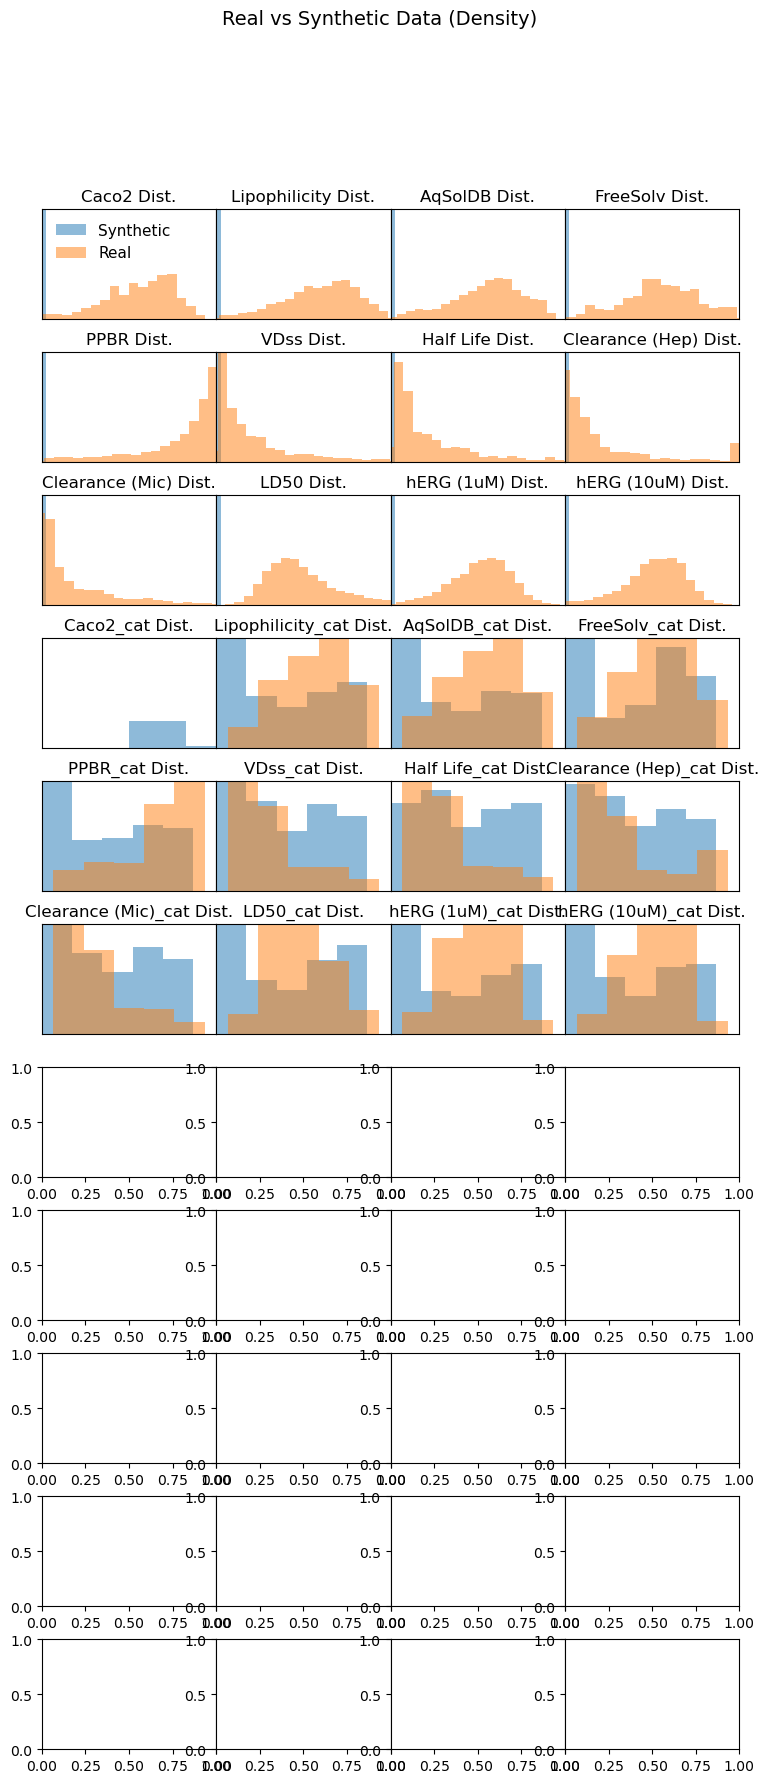

In [6]:
fig = plt.figure(figsize=(9,20))
gs = fig.add_gridspec(11,4, wspace=0, hspace=0.3)
ax = gs.subplots(sharey=False, sharex=False)

print(gt.columns)
names = [
    "Caco2",
    "Lipophilicity",
    "AqSolDB",
    "FreeSolv",
    "PPBR",
    "VDss",
    "Half Life",
    "Clearance (Hep)",
    "Clearance (Mic)",
    "LD50",
    "hERG (1uM)",
    "hERG (10uM)",
    # Categorical
    "Caco2_cat",
    "Lipophilicity_cat",
    "AqSolDB_cat",
    "FreeSolv_cat",
    "PPBR_cat",
    "VDss_cat",
    "Half Life_cat",
    "Clearance (Hep)_cat",
    "Clearance (Mic)_cat",
    "LD50_cat",
    "hERG (1uM)_cat",
    "hERG (10uM)_cat",
    # 'PAMPA_NCATS',
    # 'HIA_Hou',
    # 'Pgp_Broccatelli',
    # 'Bioavailability_Ma',
    # 'BBB_Martins',
    # 'CYP2C19_Veith',
    # 'CYP2D6_Veith',
    # 'CYP3A4_Veith',
    # 'CYP1A2_Veith',
    # 'CYP2C9_Veith',
    # 'CYP2C9_Substrate',
    # 'CYP2D6_Substrate',
    # 'CYP3A4_Substrate',
    # 'AMES',
    # 'DILI',
    # 'Skin Reaction',
    # 'Carcinogens_Lagunin',
    # 'ClinTox',
    # 'Tox21NR-AR', 'Tox21NR-AR-LBD', 'Tox21NR-AhR', 'Tox21NR-Aromatase',
    #    'Tox21NR-ER', 'Tox21NR-ER-LBD', 'Tox21NR-PPAR-gamma', 'Tox21SR-ARE',
    #    'Tox21SR-ATAD5', 'Tox21SR-HSE', 'Tox21SR-MMP', 'Tox21SR-p53'
]

for c, (col, y) in enumerate(vlists.items()):
    #print(c//6, c%6)
    i = c // 4
    j = c % 4

    print(i,j)

    x = preds[c]

    print(c)
    print("preds", np.average(x), np.std(x))
    print("act", np.average(y), np.std(y))
    
    bins=20
    if c > 12:
        bins=5
    if c< 12:
        print("here")

    ax[i][j].set_title(f"{names[c]} Dist.", fontsize=12)
    ax[i][j].hist(x, bins=bins, alpha=0.5, label='Synthetic', density=True)
    ax[i][j].hist(y, bins=bins, alpha=0.5, label='Real', density=True)
    ax[i][j].set_ylim(0,2.8)
    ax[i][j].set_xlim(-1,1)
    if c > 12:
        ax[i][j].set_ylim(0,0.1)
        ax[i][j].set_xlim(0,15)
    ax[i][j].get_xaxis().set_ticks([])
    ax[i][j].get_yaxis().set_ticks([])
    #plt.yscale('log')

    # xyhist(preds[i], vlists[col], f"{col} Real vs Synthetic Data (Epoch: {e})")

ax[0][0].legend(loc='upper left', fontsize=11, frameon=False)
fig.suptitle("Real vs Synthetic Data (Density)", fontsize=14)